# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [136]:
import os
import numpy as np
import time
import random
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
import json
from scipy.stats import linregress
from pprint import pprint
from citipy import citipy
from api_keys import weather_api_key
from api_keys import g_key

In [138]:
lat = np.random.uniform(-90, 90, 1000)
lon = np.random.uniform(-180, 180, 1000)
city = citipy.nearest_city(37.7, 122.4)
coors = zip(lat, lon)

cities_coors = set()
cities = set()
for  coor in coors:
    if len(cities) < 500:
        cities.add(citipy.nearest_city(coor[0], coor[1]).city_name)
#print(cities)
print(lat)
#print(lon)

[ 6.77038847e+01  4.22049475e+01 -8.51362360e+01  7.80206682e+01
  1.37602296e+01  5.87879354e+01  8.33065282e+01 -5.53781405e+00
  2.83217473e+00 -5.48743268e+01 -8.81007154e+01  3.29675445e+01
 -1.57928454e+01  2.69484984e+00  8.41401077e+01 -2.14141806e+01
 -4.59389503e+00 -5.67646586e+01 -2.66560907e+01  2.68052423e-01
 -5.63940425e+01  1.82756497e+01  6.69932922e+01 -1.26148417e+01
 -6.82044466e+01  7.03001029e+01 -2.93446482e+01 -7.52984136e+01
 -6.84153214e+01 -3.26424751e+01  3.00845527e+01  3.47266913e+01
  2.86221568e+01 -2.00070354e+01 -4.66014613e+01 -2.37881151e+01
 -3.97076834e+01  1.03908423e+01 -6.50174455e+01 -4.79629878e+01
  7.64886713e+01 -9.63841923e+00 -6.99998778e+01 -4.21975374e+01
 -3.88362277e+01 -2.67007031e+01  4.76041944e+01 -3.45109662e+01
  2.88269240e+01  7.43271725e+01  7.00691453e+01  6.71014354e+01
 -1.42764363e+01  1.92870513e+01  6.18257941e+01 -1.38270946e+01
  4.03885347e+01  6.32664410e+01 -1.11731896e+01  2.69879585e+01
  8.22871544e+01  8.56438

In [139]:
df_cities = pd.DataFrame(cities)
outputfile = "list_of_cities.csv"
df_cities.to_csv(outputfile)

In [140]:
url = "http://api.openweathermap.org/data/2.5/weather?"

#city = "London"

# Build query URL
#query_url = url + "appid=" + weather_api_key + "&q=" + city
for city in cities:
    try:
        query_url = url + "appid=" + weather_api_key  + "&q=" + city
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        print(f"The weather API responded with: {weather_json}.")
    except:
        print("can't find city name")


The weather API responded with: {'coord': {'lon': 16.86, 'lat': 54.58}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 275.27, 'feels_like': 264.52, 'temp_min': 275.27, 'temp_max': 275.27, 'pressure': 1019, 'humidity': 85, 'sea_level': 1019, 'grnd_level': 1019}, 'wind': {'speed': 12.49, 'deg': 42}, 'snow': {'3h': 0.55}, 'clouds': {'all': 100}, 'dt': 1585462808, 'sys': {'country': 'PL', 'sunrise': 1585456282, 'sunset': 1585502569}, 'timezone': 7200, 'id': 3082756, 'name': 'Ustka', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 42.46, 'lat': 37.52}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 281.13, 'feels_like': 277.09, 'temp_min': 281.13, 'temp_max': 281.13, 'pressure': 1008, 'humidity': 45, 'sea_level': 1008, 'grnd_level': 855}, 'wind': {'speed': 2.33, 'deg': 204}, 'rain': {'3h': 1.82}, 'clouds': {'all': 35}, 'dt': 

The weather API responded with: {'coord': {'lon': 53.35, 'lat': 47.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 285.76, 'feels_like': 278.9, 'temp_min': 285.76, 'temp_max': 285.76, 'pressure': 1022, 'humidity': 42, 'sea_level': 1022, 'grnd_level': 1025}, 'wind': {'speed': 6.97, 'deg': 127}, 'clouds': {'all': 0}, 'dt': 1585462812, 'sys': {'country': 'KZ', 'sunrise': 1585447849, 'sunset': 1585493491}, 'timezone': 18000, 'id': 608872, 'name': 'Makat', 'cod': 200}.
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
The weather API responded with: {'coord': {'lon': -60.44, 'lat': -26.79}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 293.43, 'feels_like': 295.8, 'temp_min': 293.43, 'temp_max': 293.43, 'pressure': 1012, 'humidity': 9

The weather API responded with: {'coord': {'lon': -114.35, 'lat': 62.46}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 244.13, 'feels_like': 238.45, 'temp_min': 243.15, 'temp_max': 245.15, 'pressure': 1024, 'humidity': 75}, 'visibility': 24140, 'wind': {'speed': 2.6, 'deg': 160}, 'clouds': {'all': 5}, 'dt': 1585462816, 'sys': {'type': 1, 'id': 1007, 'country': 'CA', 'sunrise': 1585487172, 'sunset': 1585534646}, 'timezone': -21600, 'id': 6185377, 'name': 'Yellowknife', 'cod': 200}.
The weather API responded with: {'coord': {'lon': -96.47, 'lat': 15.74}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 297.59, 'feels_like': 299.39, 'temp_min': 297.59, 'temp_max': 297.59, 'pressure': 1009, 'humidity': 84}, 'wind': {'speed': 3.81, 'deg': 309}, 'clouds': {'all': 0}, 'dt': 1585462816, 'sys': {'type': 3, 'id': 2005410, 'country': 'MX', 'sunris

The weather API responded with: {'coord': {'lon': 39.72, 'lat': -10}, 'weather': [{'id': 211, 'main': 'Thunderstorm', 'description': 'thunderstorm', 'icon': '11d'}], 'base': 'stations', 'main': {'temp': 298.15, 'feels_like': 300.38, 'temp_min': 298.15, 'temp_max': 298.15, 'pressure': 1012, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 180}, 'clouds': {'all': 75}, 'dt': 1585462819, 'sys': {'type': 1, 'id': 2617, 'country': 'TZ', 'sunrise': 1585452287, 'sunset': 1585495594}, 'timezone': 10800, 'id': 878281, 'name': 'Lindi', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 150.8, 'lat': -2.57}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 302.42, 'feels_like': 305.7, 'temp_min': 302.42, 'temp_max': 302.42, 'pressure': 1005, 'humidity': 68, 'sea_level': 1005, 'grnd_level': 1004}, 'wind': {'speed': 2.6, 'deg': 350}, 'rain': {'3h': 1.03}, 'clouds': {'all': 41}, 'dt': 1585462819, 

The weather API responded with: {'coord': {'lon': 139.9, 'lat': 69.3}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 259.98, 'feels_like': 255.28, 'temp_min': 259.98, 'temp_max': 259.98, 'pressure': 992, 'humidity': 90, 'sea_level': 992, 'grnd_level': 920}, 'wind': {'speed': 1.94, 'deg': 32}, 'snow': {'3h': 0.23}, 'clouds': {'all': 100}, 'dt': 1585462822, 'sys': {'country': 'RU', 'sunrise': 1585425553, 'sunset': 1585474252}, 'timezone': 36000, 'id': 2028164, 'name': 'Deputatsky', 'cod': 200}.
The weather API responded with: {'coord': {'lon': -52.87, 'lat': 68.71}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 271.6, 'feels_like': 265.16, 'temp_min': 271.6, 'temp_max': 271.6, 'pressure': 1005, 'humidity': 98, 'sea_level': 1005, 'grnd_level': 1005}, 'wind': {'speed': 6.01, 'deg': 93}, 'snow': {'3h': 1.9}, 'clouds': {'all': 100}, 'dt': 1585462

The weather API responded with: {'coord': {'lon': 12.98, 'lat': 31.45}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 288.35, 'feels_like': 285.46, 'temp_min': 288.35, 'temp_max': 288.35, 'pressure': 1009, 'humidity': 39, 'sea_level': 1009, 'grnd_level': 955}, 'wind': {'speed': 1.58, 'deg': 132}, 'clouds': {'all': 2}, 'dt': 1585462826, 'sys': {'country': 'LY', 'sunrise': 1585458002, 'sunset': 1585502712}, 'timezone': 7200, 'id': 2214827, 'name': 'Mizdah', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 152.43, 'lat': -3.67}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 301.86, 'feels_like': 304.79, 'temp_min': 301.86, 'temp_max': 301.86, 'pressure': 1005, 'humidity': 74, 'sea_level': 1005, 'grnd_level': 999}, 'wind': {'speed': 3.8, 'deg': 315}, 'rain': {'3h': 2.73}, 'clouds': {'all': 99}, 'dt': 1585462827, 'sys': {'cou

The weather API responded with: {'coord': {'lon': -35.46, 'lat': -5.2}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 298.15, 'feels_like': 302.48, 'temp_min': 298.15, 'temp_max': 298.15, 'pressure': 1011, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 220}, 'clouds': {'all': 20}, 'dt': 1585462830, 'sys': {'type': 1, 'id': 8452, 'country': 'BR', 'sunrise': 1585470258, 'sunset': 1585513702}, 'timezone': -10800, 'id': 3386213, 'name': 'Touros', 'cod': 200}.
The weather API responded with: {'coord': {'lon': -39.25, 'lat': -17.71}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 298.11, 'feels_like': 299.8, 'temp_min': 298.11, 'temp_max': 298.11, 'pressure': 1016, 'humidity': 87, 'sea_level': 1016, 'grnd_level': 1015}, 'wind': {'speed': 4.79, 'deg': 185}, 'rain': {'3h': 0.36}, 'clouds': {'all': 20}, 'dt': 1585462830, 

The weather API responded with: {'coord': {'lon': 117.15, 'lat': 35.08}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 283.86, 'feels_like': 280, 'temp_min': 283.86, 'temp_max': 283.86, 'pressure': 1020, 'humidity': 53, 'sea_level': 1020, 'grnd_level': 1012}, 'wind': {'speed': 3.01, 'deg': 180}, 'clouds': {'all': 100}, 'dt': 1585462833, 'sys': {'country': 'CN', 'sunrise': 1585432938, 'sunset': 1585477785}, 'timezone': 28800, 'id': 1793036, 'name': 'Tengzhou', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 95.32, 'lat': 5.56}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 304.38, 'feels_like': 307.44, 'temp_min': 304.38, 'temp_max': 304.38, 'pressure': 1009, 'humidity': 65, 'sea_level': 1009, 'grnd_level': 1008}, 'wind': {'speed': 3.82, 'deg': 30}, 'rain': {'3h': 0.13}, 'clouds': {'all': 71}, 'dt': 1585462833, 's

The weather API responded with: {'cod': '404', 'message': 'city not found'}.
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
The weather API responded with: {'coord': {'lon': 113.93, 'lat': -7.05}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 303.41, 'feels_like': 307.71, 'temp_min': 303.41, 'temp_max': 303.41, 'pressure': 1007, 'humidity': 66, 'sea_level': 1007, 'grnd_level': 1007}, 'wind': {'speed': 1.5, 'deg': 45}, 'clouds': {'all': 19}, 'dt': 1585462837, 'sys': {'country': 'ID', 'sunrise': 1585434435, 'sunset': 1585477833}, 'timezone': 25200, 'id': 1641977, 'name': 'Kalianget', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 54.02, 'lat': 32.25}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 289.15, 'feels_like': 285.11, 'temp_min': 289.15, 'temp_max': 289.15, 'pressure': 1011, '

The weather API responded with: {'coord': {'lon': 175.52, 'lat': -41.41}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 286.6, 'feels_like': 283.33, 'temp_min': 285.93, 'temp_max': 287.59, 'pressure': 1024, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 190}, 'rain': {'3h': 1.61}, 'clouds': {'all': 93}, 'dt': 1585462840, 'sys': {'type': 1, 'id': 7358, 'country': 'NZ', 'sunrise': 1585420203, 'sunset': 1585462508}, 'timezone': 46800, 'id': 2206874, 'name': 'Waipawa', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 30.79, 'lat': 59.7}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 274.36, 'feels_like': 267.67, 'temp_min': 273.15, 'temp_max': 275.93, 'pressure': 1017, 'humidity': 37}, 'visibility': 10000, 'wind': {'speed': 5, 'deg': 350}, 'clouds': {'all': 20}, 'dt': 1585462840, 'sys': {'type': 1, 'id

The weather API responded with: {'coord': {'lon': 13.5, 'lat': 68.12}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 271.22, 'feels_like': 263.06, 'temp_min': 271.22, 'temp_max': 271.22, 'pressure': 1022, 'humidity': 89, 'sea_level': 1022, 'grnd_level': 1018}, 'wind': {'speed': 8.16, 'deg': 314}, 'snow': {'3h': 0.83}, 'clouds': {'all': 100}, 'dt': 1585462844, 'sys': {'country': 'NO', 'sunrise': 1585455959, 'sunset': 1585504505}, 'timezone': 7200, 'id': 3155152, 'name': 'Gravdal', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 48.53, 'lat': 5.35}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 302.9, 'feels_like': 304.33, 'temp_min': 302.9, 'temp_max': 302.9, 'pressure': 1013, 'humidity': 68, 'sea_level': 1013, 'grnd_level': 1012}, 'wind': {'speed': 5.61, 'deg': 62}, 'clouds': {'all': 80}, 'dt': 1585462844, 'sys': {

The weather API responded with: {'coord': {'lon': -151.75, 'lat': -16.52}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 302.29, 'feels_like': 304.11, 'temp_min': 302.29, 'temp_max': 302.29, 'pressure': 1011, 'humidity': 66, 'sea_level': 1011, 'grnd_level': 1011}, 'wind': {'speed': 4.21, 'deg': 73}, 'clouds': {'all': 93}, 'dt': 1585462847, 'sys': {'country': 'PF', 'sunrise': 1585411931, 'sunset': 1585455073}, 'timezone': -36000, 'id': 4033077, 'name': 'Vaitape', 'cod': 200}.
The weather API responded with: {'coord': {'lon': -81.27, 'lat': -4.58}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 296.58, 'feels_like': 298.03, 'temp_min': 296.58, 'temp_max': 296.58, 'pressure': 1011, 'humidity': 78, 'sea_level': 1011, 'grnd_level': 1009}, 'wind': {'speed': 2.79, 'deg': 172}, 'clouds': {'all': 11}, 'dt': 1585462847, 'sys': {'country

The weather API responded with: {'coord': {'lon': -90.35, 'lat': -0.74}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.15, 'feels_like': 302.17, 'temp_min': 298.15, 'temp_max': 298.15, 'pressure': 1009, 'humidity': 80}, 'wind': {'speed': 0.45, 'deg': 360, 'gust': 0.89}, 'clouds': {'all': 74}, 'dt': 1585462850, 'sys': {'type': 3, 'id': 2005652, 'country': 'EC', 'sunrise': 1585483362, 'sunset': 1585526939}, 'timezone': -21600, 'id': 3652764, 'name': 'Puerto Ayora', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 40.52, 'lat': -12.97}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 298.15, 'feels_like': 300.45, 'temp_min': 298.15, 'temp_max': 298.15, 'pressure': 1013, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 230}, 'clouds': {'all': 75}, 'dt': 1585462851, 'sys': {'type': 1, 'id': 2206

The weather API responded with: {'coord': {'lon': 84.73, 'lat': 21.53}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 310.11, 'feels_like': 307.22, 'temp_min': 310.11, 'temp_max': 310.11, 'pressure': 1010, 'humidity': 19, 'sea_level': 1010, 'grnd_level': 989}, 'wind': {'speed': 4, 'deg': 325}, 'clouds': {'all': 0}, 'dt': 1585462854, 'sys': {'country': 'IN', 'sunrise': 1585440997, 'sunset': 1585485284}, 'timezone': 19800, 'id': 1273246, 'name': 'Deogarh', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 16.26, 'lat': 38.24}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 284.8, 'feels_like': 282.56, 'temp_min': 281.15, 'temp_max': 287.04, 'pressure': 1014, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 40}, 'clouds': {'all': 20}, 'dt': 1585462854, 'sys': {'type': 1, 'id': 6710, 'country': 'IT', 'sunr

The weather API responded with: {'coord': {'lon': 40.21, 'lat': 29.97}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 289.15, 'feels_like': 282.62, 'temp_min': 289.15, 'temp_max': 289.15, 'pressure': 1017, 'humidity': 36}, 'visibility': 10000, 'wind': {'speed': 6.7, 'deg': 300}, 'clouds': {'all': 20}, 'dt': 1585462857, 'sys': {'type': 1, 'id': 7431, 'country': 'SA', 'sunrise': 1585451505, 'sunset': 1585496141}, 'timezone': 10800, 'id': 102527, 'name': 'Sakakah', 'cod': 200}.
The weather API responded with: {'coord': {'lon': -80.61, 'lat': 51.26}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 265.15, 'feels_like': 259.73, 'temp_min': 265.15, 'temp_max': 265.15, 'pressure': 1021, 'humidity': 100}, 'visibility': 14484, 'wind': {'speed': 3.6, 'deg': 80}, 'clouds': {'all': 1}, 'dt': 1585462858, 'sys': {'type': 1, 'id': 860, 'country': 'C

The weather API responded with: {'coord': {'lon': 100.32, 'lat': 7.78}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 304.38, 'feels_like': 306.21, 'temp_min': 304.38, 'temp_max': 304.38, 'pressure': 1008, 'humidity': 58, 'sea_level': 1008, 'grnd_level': 1008}, 'wind': {'speed': 4.08, 'deg': 100}, 'clouds': {'all': 11}, 'dt': 1585462861, 'sys': {'country': 'TH', 'sunrise': 1585437485, 'sunset': 1585481314}, 'timezone': 25200, 'id': 1607068, 'name': 'Ranot', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 146.38, 'lat': -36.03}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 292.7, 'feels_like': 291.64, 'temp_min': 291.15, 'temp_max': 294.15, 'pressure': 1013, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 320}, 'clouds': {'all': 75}, 'dt': 1585462861, 'sys': {'type': 1, 'id': 9611,

The weather API responded with: {'coord': {'lon': 150.86, 'lat': -34.58}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 296.35, 'feels_like': 293.3, 'temp_min': 294.26, 'temp_max': 298.71, 'pressure': 1015, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 40}, 'clouds': {'all': 40}, 'dt': 1585462864, 'sys': {'type': 1, 'id': 9594, 'country': 'AU', 'sunrise': 1585425993, 'sunset': 1585468553}, 'timezone': 39600, 'id': 6255012, 'name': 'Flinders', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 139.27, 'lat': -35.12}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 295.29, 'feels_like': 294.42, 'temp_min': 293.15, 'temp_max': 296.48, 'pressure': 1009, 'humidity': 57}, 'wind': {'speed': 2.68, 'deg': 260, 'gust': 6.26}, 'clouds': {'all': 47}, 'dt': 1585462864, 'sys': {'type': 3, 'id': 200540

The weather API responded with: {'coord': {'lon': -3.6, 'lat': 40.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 277.9, 'feels_like': 275.46, 'temp_min': 274.15, 'temp_max': 282.04, 'pressure': 1018, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 10}, 'clouds': {'all': 1}, 'dt': 1585462868, 'sys': {'type': 1, 'id': 6443, 'country': 'ES', 'sunrise': 1585461755, 'sunset': 1585506916}, 'timezone': 7200, 'id': 3129857, 'name': 'Aranjuez', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 39.64, 'lat': -0.45}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 301.72, 'feels_like': 304.57, 'temp_min': 301.72, 'temp_max': 301.72, 'pressure': 1013, 'humidity': 64, 'sea_level': 1013, 'grnd_level': 997}, 'wind': {'speed': 1.96, 'deg': 177}, 'clouds': {'all': 100}, 'dt': 1585462868, 'sys': {'country': 'KE',

The weather API responded with: {'coord': {'lon': 57.76, 'lat': -20.21}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 302.09, 'feels_like': 303.77, 'temp_min': 302.04, 'temp_max': 302.15, 'pressure': 1011, 'humidity': 79}, 'visibility': 8000, 'wind': {'speed': 6.7, 'deg': 100}, 'clouds': {'all': 40}, 'dt': 1585462871, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1585448108, 'sunset': 1585491115}, 'timezone': 14400, 'id': 1106643, 'name': 'Quatre Cocos', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 136.63, 'lat': 50.72}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 276.12, 'feels_like': 270.35, 'temp_min': 276.12, 'temp_max': 276.12, 'pressure': 1007, 'humidity': 65, 'sea_level': 1007, 'grnd_level': 971}, 'wind': {'speed': 4.85, 'deg': 240}, 'clouds': {'all': 71}, 'dt': 1585462871, 'sys': {'count

The weather API responded with: {'coord': {'lon': 169.15, 'lat': -44.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 285.64, 'feels_like': 283.15, 'temp_min': 285.64, 'temp_max': 285.64, 'pressure': 1027, 'humidity': 54, 'sea_level': 1027, 'grnd_level': 988}, 'wind': {'speed': 1.53, 'deg': 119}, 'clouds': {'all': 1}, 'dt': 1585462874, 'sys': {'country': 'NZ', 'sunrise': 1585421806, 'sunset': 1585463962}, 'timezone': 46800, 'id': 2184707, 'name': 'Wanaka', 'cod': 200}.
The weather API responded with: {'coord': {'lon': -16.55, 'lat': 12.48}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 295.13, 'feels_like': 296.87, 'temp_min': 294.15, 'temp_max': 296.15, 'pressure': 1012, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 340}, 'clouds': {'all': 45}, 'dt': 1585462875, 'sys': {'type': 1, 'id': 2413, 'country':

The weather API responded with: {'coord': {'lon': 58.43, 'lat': 50.25}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 277.68, 'feels_like': 272.33, 'temp_min': 277.68, 'temp_max': 277.68, 'pressure': 1028, 'humidity': 58, 'sea_level': 1028, 'grnd_level': 975}, 'wind': {'speed': 4.23, 'deg': 167}, 'clouds': {'all': 96}, 'dt': 1585462877, 'sys': {'country': 'KZ', 'sunrise': 1585446527, 'sunset': 1585492375}, 'timezone': 18000, 'id': 609404, 'name': 'Khromtau', 'cod': 200}.
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
The weather API responded with: {'coord': {'lon': -131.65, 'lat': 55.34}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 277.56, 'feels_like': 274.31, 'temp_min': 277.15, 'temp_max': 278.15, 'pressure': 996, 'humidity': 93}, 'visibility': 16093, 'wind': {'speed': 2.6, 'deg': 10}, 'rain'

The weather API responded with: {'coord': {'lon': -12.51, 'lat': 7.53}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 299.17, 'feels_like': 303.68, 'temp_min': 299.17, 'temp_max': 299.17, 'pressure': 1010, 'humidity': 86, 'sea_level': 1010, 'grnd_level': 1009}, 'wind': {'speed': 1.45, 'deg': 290}, 'clouds': {'all': 17}, 'dt': 1585462882, 'sys': {'country': 'SL', 'sunrise': 1585464558, 'sunset': 1585508388}, 'timezone': 0, 'id': 2409914, 'name': 'Bonthe', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 87.73, 'lat': 50.3}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 263.02, 'feels_like': 257.6, 'temp_min': 263.02, 'temp_max': 263.02, 'pressure': 1024, 'humidity': 61, 'sea_level': 1024, 'grnd_level': 779}, 'wind': {'speed': 2.84, 'deg': 333}, 'snow': {'3h': 0.43}, 'clouds': {'all': 100}, 'dt': 1585462882, 'sys': {'cou

The weather API responded with: {'coord': {'lon': -28.7, 'lat': 38.52}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 287.15, 'feels_like': 284.02, 'temp_min': 287.15, 'temp_max': 287.15, 'pressure': 1014, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 320}, 'clouds': {'all': 40}, 'dt': 1585462885, 'sys': {'type': 1, 'id': 6883, 'country': 'PT', 'sunrise': 1585467815, 'sunset': 1585512900}, 'timezone': 0, 'id': 3372707, 'name': 'Ribeira Grande', 'cod': 200}.
The weather API responded with: {'coord': {'lon': 27.91, 'lat': -33.02}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 292.15, 'feels_like': 288.43, 'temp_min': 292.15, 'temp_max': 292.15, 'pressure': 1017, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 280}, 'clouds': {'all': 20}, 'dt': 1585462885, 'sys': {'type': 1, 'id': 1912,

The weather API responded with: {'coord': {'lon': -72.42, 'lat': -35.33}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 286.88, 'feels_like': 284.56, 'temp_min': 286.88, 'temp_max': 286.88, 'pressure': 1016, 'humidity': 82, 'sea_level': 1016, 'grnd_level': 1013}, 'wind': {'speed': 3.66, 'deg': 190}, 'clouds': {'all': 29}, 'dt': 1585462888, 'sys': {'country': 'CL', 'sunrise': 1585479623, 'sunset': 1585522074}, 'timezone': -10800, 'id': 3893726, 'name': 'Constitución', 'cod': 200}.
The weather API responded with: {'coord': {'lon': -37.67, 'lat': -8.7}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 294.92, 'feels_like': 296.87, 'temp_min': 294.92, 'temp_max': 294.92, 'pressure': 1013, 'humidity': 84, 'sea_level': 1013, 'grnd_level': 969}, 'wind': {'speed': 1.8, 'deg': 149}, 'clouds': {'all': 49}, 'dt': 1585462889, 'sys': 

The weather API responded with: {'coord': {'lon': -92.11, 'lat': 46.78}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}, {'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 273.8, 'feels_like': 266.91, 'temp_min': 273.15, 'temp_max': 274.82, 'pressure': 1001, 'humidity': 85}, 'visibility': 3219, 'wind': {'speed': 6.7, 'deg': 50, 'gust': 14.9}, 'rain': {'1h': 2.92}, 'snow': {'1h': 0.51}, 'clouds': {'all': 90}, 'dt': 1585462737, 'sys': {'type': 1, 'id': 5944, 'country': 'US', 'sunrise': 1585482744, 'sunset': 1585528401}, 'timezone': -18000, 'id': 5024719, 'name': 'Duluth', 'cod': 200}.
The weather API responded with: {'coord': {'lon': -17.92, 'lat': 28.66}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 289.15, 'feels_like': 286.75, 'temp_min': 289.15, 'temp_max': 289.15, 'pressure': 1019, 'humidity': 63}, 'visibility': 1

The weather API responded with: {'coord': {'lon': 43.95, 'lat': 44.49}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 283.13, 'feels_like': 278.22, 'temp_min': 283.13, 'temp_max': 283.13, 'pressure': 1006, 'humidity': 52, 'sea_level': 1006, 'grnd_level': 989}, 'wind': {'speed': 4.3, 'deg': 101}, 'clouds': {'all': 45}, 'dt': 1585462895, 'sys': {'country': 'RU', 'sunrise': 1585450216, 'sunset': 1585495635}, 'timezone': 10800, 'id': 521316, 'name': 'Niny', 'cod': 200}.
The weather API responded with: {'coord': {'lon': -133.04, 'lat': 69.45}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 245.15, 'feels_like': 238.08, 'temp_min': 245.15, 'temp_max': 245.15, 'pressure': 1027, 'humidity': 75}, 'visibility': 24140, 'wind': {'speed': 4.6, 'deg': 10}, 'clouds': {'all': 20}, 'dt': 1585462895, 'sys': {'type': 1, 'id': 942, 'country': 'C

The weather API responded with: {'coord': {'lon': 54.09, 'lat': 17.02}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 300.15, 'feels_like': 301.26, 'temp_min': 300.15, 'temp_max': 300.15, 'pressure': 1013, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 160}, 'clouds': {'all': 67}, 'dt': 1585462899, 'sys': {'type': 1, 'id': 7562, 'country': 'OM', 'sunrise': 1585448426, 'sunset': 1585492559}, 'timezone': 14400, 'id': 286621, 'name': 'Salalah', 'cod': 200}.
The weather API responded with: {'coord': {'lon': -115.95, 'lat': 30.48}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 286.94, 'feels_like': 282.15, 'temp_min': 286.94, 'temp_max': 286.94, 'pressure': 1019, 'humidity': 73, 'sea_level': 1019, 'grnd_level': 1018}, 'wind': {'speed': 6.54, 'deg': 326}, 'clouds': {'all': 86}, 'dt': 1585462899, 'sys': {'cou

The weather API responded with: {'coord': {'lon': 102.28, 'lat': 60.34}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 270.7, 'feels_like': 263.88, 'temp_min': 270.7, 'temp_max': 270.7, 'pressure': 1003, 'humidity': 92, 'sea_level': 1003, 'grnd_level': 969}, 'wind': {'speed': 6.24, 'deg': 269}, 'snow': {'3h': 0.35}, 'clouds': {'all': 100}, 'dt': 1585462902, 'sys': {'country': 'RU', 'sunrise': 1585435466, 'sunset': 1585482393}, 'timezone': 25200, 'id': 2013727, 'name': 'Vanavara', 'cod': 200}.
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
The weather API responded with: {'coord': {'lon': 12.37, 'lat': -6.13}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 300.4, 'feels_like': 304.54, 'temp_min': 300.4, 'temp_max': 300.4, 'pressure': 1011, 'humidity': 87, 'sea_level': 1011, 'grnd_level': 1011}, 'wind': {'sp

In [141]:
url = "http://api.openweathermap.org/data/2.5/weather?"
for city in cities:
    try:
        query_url = url + "appid=" + weather_api_key  + "&q=" + city
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        print(f"The temperature vs latitude: {weather_json['main']['temp']} {weather_json['coord']['lat']}.")
    except:
        print("can't find city name")

The temperature vs latitude: 275.27 54.58.
The temperature vs latitude: 281.13 37.52.
The temperature vs latitude: 288.15 -33.28.
The temperature vs latitude: 249.48 71.92.
The temperature vs latitude: 273 47.47.
The temperature vs latitude: 295.15 -36.23.
The temperature vs latitude: 269.52 63.87.
The temperature vs latitude: 306.15 6.12.
The temperature vs latitude: 294.15 -6.28.
The temperature vs latitude: 295.01 -15.89.
The temperature vs latitude: 273.36 61.99.
The temperature vs latitude: 277.79 52.85.
The temperature vs latitude: 301.07 25.29.
The temperature vs latitude: 295.26 -15.2.
The temperature vs latitude: 285.06 -45.87.
The temperature vs latitude: 285.76 47.65.
can't find city name
can't find city name
The temperature vs latitude: 293.43 -26.79.
The temperature vs latitude: 287.59 -34.42.
The temperature vs latitude: 297.83 8.08.
The temperature vs latitude: 287.15 -33.01.
The temperature vs latitude: 262.04 73.51.
The temperature vs latitude: 301.24 11.74.
The temper

The temperature vs latitude: 302.08 -5.67.
can't find city name
The temperature vs latitude: 295.33 20.2.
can't find city name
The temperature vs latitude: 281.15 56.6.
The temperature vs latitude: 275.07 46.49.
The temperature vs latitude: 272.89 47.67.
The temperature vs latitude: 271.15 61.69.
The temperature vs latitude: 282.63 -45.13.
The temperature vs latitude: 265.32 51.23.
The temperature vs latitude: 296.15 20.75.
The temperature vs latitude: 308.36 18.93.
The temperature vs latitude: 289.87 -42.78.
The temperature vs latitude: 310.11 21.53.
The temperature vs latitude: 284.8 38.24.
The temperature vs latitude: 298.15 -23.86.
The temperature vs latitude: 294.15 -33.87.
The temperature vs latitude: 299.15 13.22.
The temperature vs latitude: 275.54 46.1.
The temperature vs latitude: 305.46 5.41.
The temperature vs latitude: 276.15 60.92.
The temperature vs latitude: 283.93 42.1.
The temperature vs latitude: 301.42 18.74.
The temperature vs latitude: 301.98 -8.77.
The temperatur

The temperature vs latitude: 295.42 20.34.
The temperature vs latitude: 296.15 20.7.
The temperature vs latitude: 306.54 27.92.
The temperature vs latitude: 286.15 35.03.
The temperature vs latitude: 283.13 44.49.
The temperature vs latitude: 245.15 69.45.
The temperature vs latitude: 295.74 -8.93.
can't find city name
The temperature vs latitude: 271.25 60.38.
The temperature vs latitude: 278.74 53.03.
The temperature vs latitude: 259.2 72.79.
The temperature vs latitude: 298.35 18.42.
The temperature vs latitude: 278.15 43.32.
The temperature vs latitude: 293.49 -33.23.
The temperature vs latitude: 287.15 -29.95.
The temperature vs latitude: 281.17 41.02.
The temperature vs latitude: 293.38 -18.03.
The temperature vs latitude: 303.28 12.55.
The temperature vs latitude: 293.08 -34.65.
The temperature vs latitude: 298.15 -7.12.
The temperature vs latitude: 300.15 17.02.
The temperature vs latitude: 286.94 30.48.
The temperature vs latitude: 295.15 9.79.
The temperature vs latitude: 270

In [142]:
all_cities_data = []
url = "http://api.openweathermap.org/data/2.5/weather?"
lat, lon, temp, humidity, cloudiness, wind, temp_max = [], [], [], [], [], [], []
northern_hemisphere, southern_hemisphere = [], []
for city in cities:
    try:
        query_url = url + "appid=" + weather_api_key  + "&q=" + city
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        print(f"The humidity vs latitude: {weather_json['main']['humidity']} {weather_json['coord']['lat']}.")
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
        temp.append(weather_json['main']['temp'])
        temp_max.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind.append(weather_json['wind']['speed'])
              
    except:
        print("can't find city name")

The humidity vs latitude: 85 54.58.
The humidity vs latitude: 45 37.52.
The humidity vs latitude: 77 -33.28.
The humidity vs latitude: 87 71.92.
The humidity vs latitude: 69 47.47.
The humidity vs latitude: 40 -36.23.
The humidity vs latitude: 89 63.87.
The humidity vs latitude: 55 6.12.
The humidity vs latitude: 83 -6.28.
The humidity vs latitude: 86 -15.89.
The humidity vs latitude: 81 61.99.
The humidity vs latitude: 80 52.85.
The humidity vs latitude: 45 25.29.
The humidity vs latitude: 75 -15.2.
The humidity vs latitude: 73 -45.87.
The humidity vs latitude: 42 47.65.
can't find city name
can't find city name
The humidity vs latitude: 94 -26.79.
The humidity vs latitude: 97 -34.42.
The humidity vs latitude: 51 8.08.
The humidity vs latitude: 87 -33.01.
The humidity vs latitude: 95 73.51.
The humidity vs latitude: 54 11.74.
The humidity vs latitude: 74 -8.14.
The humidity vs latitude: 76 -22.97.
The humidity vs latitude: 46 -27.98.
The humidity vs latitude: 54 48.83.
The humidity vs

The humidity vs latitude: 74 1.55.
can't find city name
The humidity vs latitude: 73 22.29.
The humidity vs latitude: 78 -14.88.
The humidity vs latitude: 81 47.77.
The humidity vs latitude: 93 41.8.
The humidity vs latitude: 76 7.39.
The humidity vs latitude: 64 19.22.
The humidity vs latitude: 74 -20.26.
The humidity vs latitude: 58 7.78.
The humidity vs latitude: 73 -36.03.
The humidity vs latitude: 23 16.64.
The humidity vs latitude: 93 41.21.
The humidity vs latitude: 76 -7.61.
The humidity vs latitude: 75 -6.22.
The humidity vs latitude: 78 -25.4.
can't find city name
The humidity vs latitude: 93 33.43.
The humidity vs latitude: 90 -38.55.
The humidity vs latitude: 58 -5.32.
The humidity vs latitude: 83 -18.17.
The humidity vs latitude: 62 9.9.
can't find city name
The humidity vs latitude: 73 14.92.
The humidity vs latitude: 65 -7.96.
The humidity vs latitude: 51 60.15.
The humidity vs latitude: 64 -34.58.
The humidity vs latitude: 57 -35.12.
The humidity vs latitude: 35 22.57.


In [143]:
northern_hemisphere = city_df.loc[(city_df["lat"]>0) & (city_df["lat"]< 90)]
southern_hemisphere = city_df.loc[(city_df["lat"]>-90) & (city_df["lat"]< 0)]

print(len(northern_hemisphere))
print(northern_hemisphere)
print(len(southern_hemisphere))
print(southern_hemisphere)

47
      lat     lon    temp  humidity  cloudiness   wind  temp_max
2   38.00   31.00  280.15        70          75   4.10    280.15
3   20.93  -17.03  290.15        77          81   8.70    290.15
4   66.94  -53.67  275.21        91         100   6.18    275.21
5   51.26  -80.61  265.15       100           1   3.60    265.15
6   43.00  -84.18  281.49       100          90   4.10    282.59
7   56.11   10.17  273.61        59          60   7.70    274.26
10  19.73 -155.09  291.77        83          90   3.44    295.15
12  19.22 -104.70  296.28        64           1   1.52    296.28
13   7.79   99.63  310.48        32          16   2.71    310.48
15  38.52  -28.70  287.25        74          51   9.41    287.25
16  49.63  117.32  281.70        33           9   7.11    281.70
18  45.76  106.27  281.09        20           2   5.59    281.09
19   6.88   73.10  301.87        66          17   1.81    301.87
20  22.08 -159.32  296.45        78          75   8.20    297.15
21  66.32 -179.17  252

In [144]:
print(lat, '\n')
print(len(lat))
print(len(temp_max))
print(temp_max)
print(temp)
print(len(temp))
print(len(humidity))
print(humidity)
print(len(cloudiness))
print(cloudiness)
print(len(wind))
print(wind)

[54.58, 37.52, -33.28, 71.92, 47.47, -36.23, 63.87, 6.12, -6.28, -15.89, 61.99, 52.85, 25.29, -15.2, -45.87, 47.65, -26.79, -34.42, 8.08, -33.01, 73.51, 11.74, -8.14, -22.97, -27.98, 48.83, 57.14, 14.08, -2.27, 68.05, 62.46, 15.74, -33.92, 2.93, -43.53, 60.14, -54.8, 65.61, 10.7, -51.62, 58, 27.2, 50.78, 39.18, 48.04, -10, -2.57, 47.7, -19.98, -33.65, -34.48, 52.93, -12.23, 38.74, 35.73, 29.85, 69.7, 42.16, -38.65, -24.8, 69.3, 68.71, 32.93, 40.16, -38.65, 55.74, 52.75, -29.12, 29.11, -33.04, 78.22, 34.37, 35.13, 28.92, 31.45, -3.67, -20.33, 61.99, -34.73, 65.99, -10.98, 41.12, -26.65, -20.15, -23.53, 43.8, 46.42, 11.67, 66.15, -5.2, -17.71, 22.53, 13.49, 41.24, 52.52, 8.57, -41.87, 4.78, -8.1, 42.8, -34.53, 38.3, 77.48, 35.08, 5.56, 33.36, -45.58, -22.28, -9.58, -20.52, -9.83, -0.95, -23.13, 64.5, 20.93, 41.28, -38, -20.74, -7.05, 32.25, 19.73, -24.79, -53.15, 59.38, 41.76, 7.1, 14.17, -14.74, 4.87, 4.88, 22.89, -2.02, 40.6, -41.41, 59.7, -14.9, -28.55, -4.97, 56.67, -2.53, -37.83, 31

In [145]:
print(len(humidity))
print(humidity)
print(len(lat), len(temp))

410
[85, 45, 77, 87, 69, 40, 89, 55, 83, 86, 81, 80, 45, 75, 73, 42, 94, 97, 51, 87, 95, 54, 74, 76, 46, 54, 69, 39, 67, 89, 75, 84, 68, 80, 100, 88, 80, 94, 10, 80, 89, 33, 51, 100, 56, 94, 68, 42, 79, 31, 93, 96, 62, 93, 93, 94, 91, 100, 100, 90, 90, 98, 76, 91, 82, 59, 72, 87, 36, 82, 65, 51, 81, 17, 39, 74, 94, 84, 65, 93, 93, 74, 63, 50, 40, 93, 85, 66, 82, 94, 87, 83, 19, 93, 44, 70, 100, 85, 73, 22, 93, 93, 82, 53, 65, 48, 87, 65, 74, 79, 80, 65, 54, 76, 77, 93, 100, 29, 66, 59, 83, 73, 81, 93, 90, 31, 49, 81, 89, 89, 57, 74, 87, 93, 37, 75, 78, 76, 89, 51, 46, 41, 83, 94, 88, 73, 82, 83, 89, 68, 43, 77, 74, 85, 68, 91, 81, 72, 29, 18, 80, 67, 74, 66, 78, 77, 78, 74, 93, 91, 100, 70, 60, 89, 84, 83, 20, 87, 80, 88, 85, 93, 69, 30, 76, 59, 98, 50, 80, 93, 88, 37, 79, 19, 87, 69, 43, 74, 64, 70, 86, 100, 12, 77, 64, 76, 67, 83, 64, 36, 100, 75, 65, 76, 22, 74, 73, 78, 81, 93, 76, 64, 74, 58, 73, 23, 93, 76, 75, 78, 93, 90, 58, 83, 62, 73, 65, 51, 64, 57, 35, 64, 41, 67, 43, 70, 82

In [146]:
#df_all_cities_data = pd.DataFrame(all_cities_data)
city_df = pd.DataFrame({'lat':lat, 'lon': lon, 'temp': temp, 'humidity': humidity, 'cloudiness': cloudiness, 'wind': wind, 'temp_max': temp_max})
city_df

,lat,lon,temp,humidity,cloudiness,wind,temp_max
0,54.58,16.86,275.27,85,100,12.49,275.27
1,37.52,42.46,281.13,45,35,2.33,281.13
2,-33.28,-70.90,288.15,77,6,2.10,288.15
3,71.92,114.08,249.48,87,59,1.56,249.48
4,47.47,84.87,273.00,69,79,6.43,273.00
...,...,...,...,...,...,...,...
405,57.79,-152.41,272.15,80,90,7.20,272.15
406,-21.20,-175.20,299.15,83,75,3.60,299.15
407,52.37,-114.92,272.26,67,100,3.52,272.26
408,20.50,-10.07,290.00,31,0,4.08,290.00


In [147]:
df_cities = pd.DataFrame({'lat':lat, 'lon': lon, 'temp': temp, 'humidity': humidity, 'cloudiness': cloudiness, 'wind': wind, 'temp_max': temp_max})
outputfile = "list_of_every_city.csv"
df_cities.to_csv(outputfile)

In [148]:
city_df.count()

lat           410
lon           410
temp          410
humidity      410
cloudiness    410
wind          410
temp_max      410
dtype: int64

In [149]:
city_df.head()

,lat,lon,temp,humidity,cloudiness,wind,temp_max
0,54.58,16.86,275.27,85,100,12.49,275.27
1,37.52,42.46,281.13,45,35,2.33,281.13
2,-33.28,-70.90,288.15,77,6,2.10,288.15
3,71.92,114.08,249.48,87,59,1.56,249.48
4,47.47,84.87,273.00,69,79,6.43,273.00


In [150]:
pd.DataFrame(cities).head()

,0
0,ustka
1,sirnak
2,lampa
3,saskylakh
4,zaysan


## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

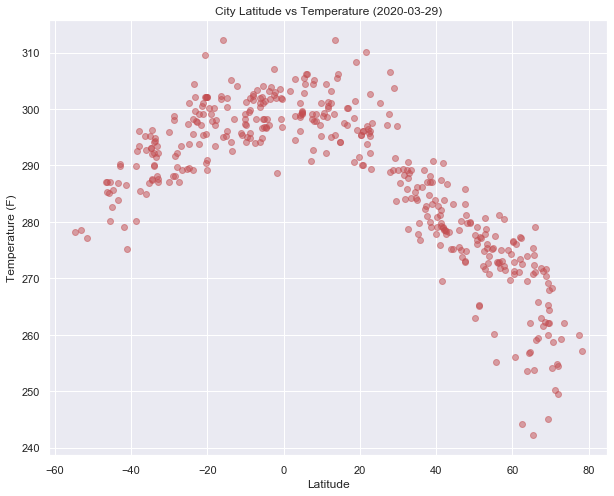

In [151]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(city_df["lat"], city_df["temp"], color='r', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title(f'City Latitude vs Temperature ({datetime.now().date()})')
plt.savefig("LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

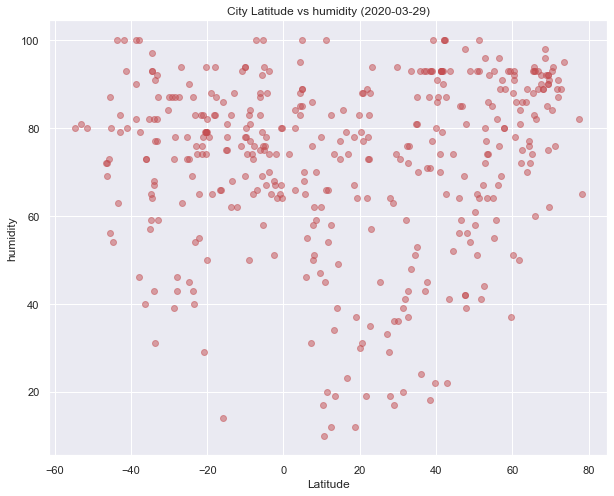

In [152]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(city_df["lat"], city_df["humidity"], color='r', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('humidity')
plt.title(f'City Latitude vs humidity ({datetime.now().date()})')
plt.savefig("LatVshumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

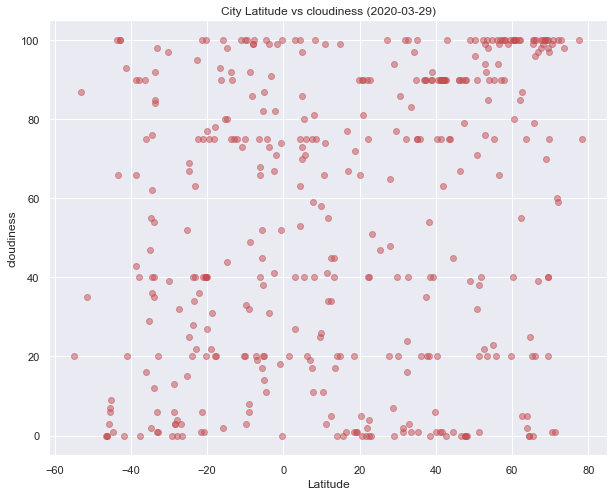

In [153]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(city_df["lat"], city_df["cloudiness"], color='r', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('cloudiness')
plt.title(f'City Latitude vs cloudiness ({datetime.now().date()})')
plt.savefig("LatVscloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

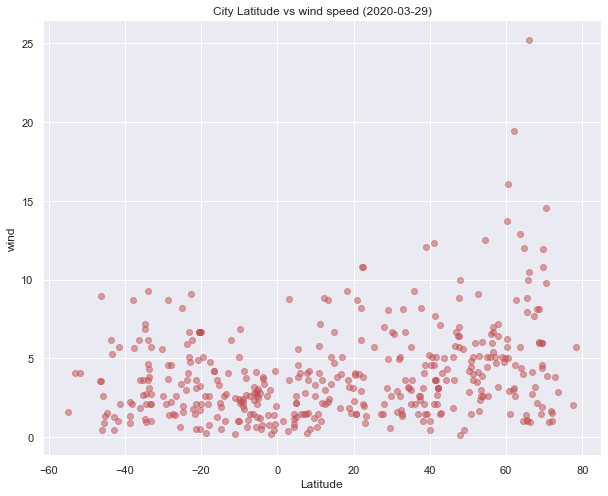

In [154]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(city_df["lat"], city_df["wind"], color='r', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('wind')
plt.title(f'City Latitude vs wind speed ({datetime.now().date()})')
plt.savefig("LatVswindspeed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

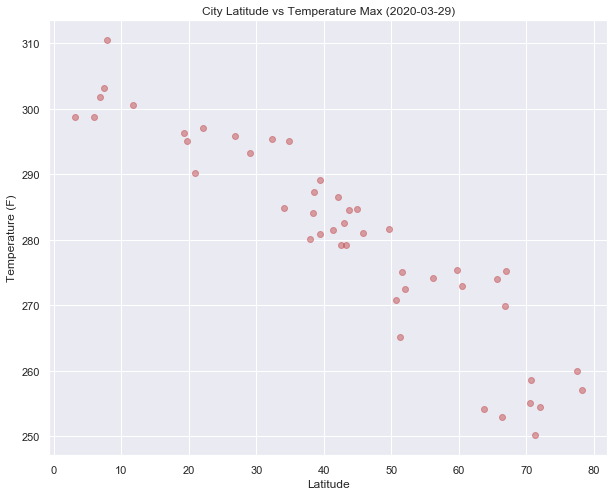

In [155]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(northern_hemisphere["lat"], northern_hemisphere["temp_max"], color='r', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title(f'City Latitude vs Temperature Max ({datetime.now().date()})')
plt.savefig("North_LatVsTempMax.png")
plt.show()

NameError: name 'slope' is not defined

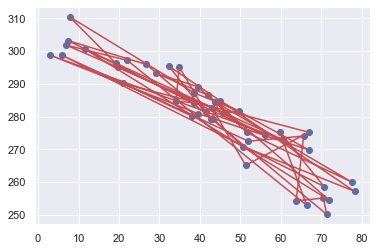

In [156]:
plt.scatter(northern_hemisphere["lat"], northern_hemisphere["temp_max"])
plt.plot(northern_hemisphere["lat"], northern_hemisphere["temp_max"],"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (6, 50), fontsize=15,color="red")
#plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["lat"], northern_hemisphere["temp_max"])
print('the r value is', rvalue)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

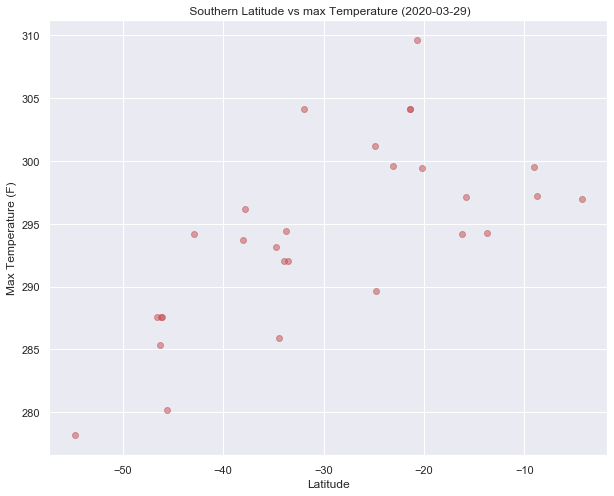

In [157]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(southern_hemisphere["lat"], southern_hemisphere["temp_max"], color='r', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f' Southern Latitude vs max Temperature ({datetime.now().date()})')
plt.savefig("South_Lat_vs_max_temp.png")
plt.show()

NameError: name 'slope' is not defined

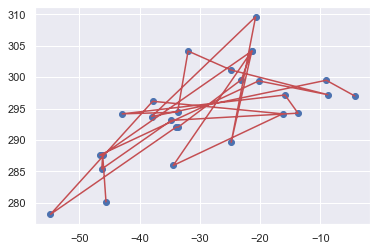

In [158]:
plt.scatter(southern_hemisphere["lat"], southern_hemisphere["temp_max"])
plt.plot(southern_hemisphere["lat"], southern_hemisphere["temp_max"],"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (6, 50), fontsize=15,color="red")
#plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["lat"], southern_hemisphere["temp_max"])
print('the r value is', rvalue)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

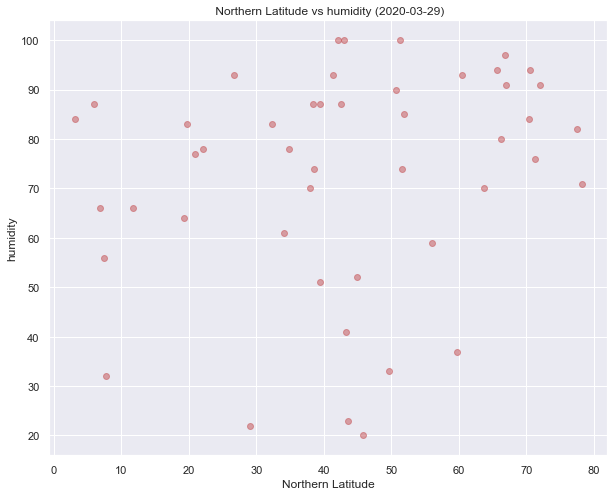

In [159]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(northern_hemisphere["lat"], northern_hemisphere["humidity"], color='r', alpha=0.5)
plt.xlabel('Northern Latitude')
plt.ylabel('humidity')
plt.title(f' Northern Latitude vs humidity ({datetime.now().date()})')
plt.savefig("N_Lat_vs_humidity.png")
plt.show()

NameError: name 'slope' is not defined

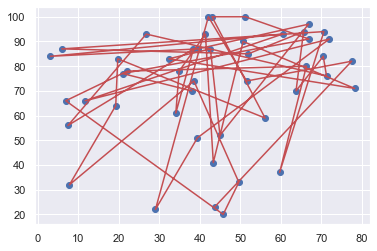

In [160]:
plt.scatter(northern_hemisphere["lat"], northern_hemisphere["humidity"])
plt.plot(northern_hemisphere["lat"], northern_hemisphere["humidity"],"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (6, 50), fontsize=15,color="red")
#plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["lat"], northern_hemisphere["humidity"])
print('the r value is', rvalue)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

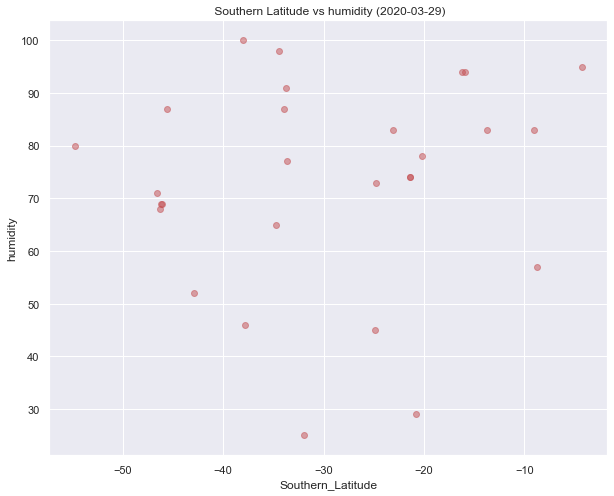

In [161]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(southern_hemisphere["lat"], southern_hemisphere["humidity"], color='r', alpha=0.5)
plt.xlabel('Southern_Latitude')
plt.ylabel('humidity')
plt.title(f' Southern Latitude vs humidity ({datetime.now().date()})')
plt.savefig("Southern_Lat_vs_humidity.png")
plt.show()

NameError: name 'slope' is not defined

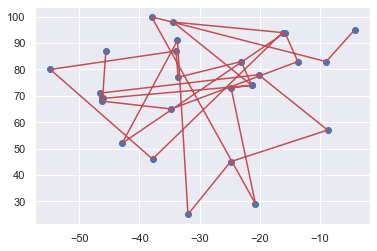

In [162]:
plt.scatter(southern_hemisphere["lat"], southern_hemisphere["humidity"])
plt.plot(southern_hemisphere["lat"], southern_hemisphere["humidity"],"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (6, 50), fontsize=15,color="red")
#plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["lat"], southern_hemisphere["humidity"])
print('the r value is', rvalue)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(northern_hemisphere["lat"], northern_hemisphere["cloudiness"], color='r', alpha=0.5)
plt.xlabel('northern Latitude')
plt.ylabel('cloudiness (F)')
plt.title(f'N Latitude vs cloudiness ({datetime.now().date()})')
plt.savefig("northern_lat_vs_cloudiness.png")
plt.show()

NameError: name 'slope' is not defined

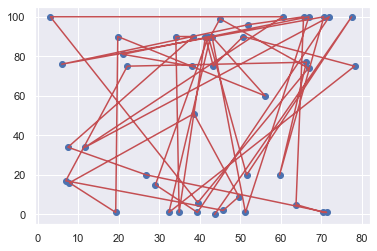

In [163]:
plt.scatter(northern_hemisphere["lat"], northern_hemisphere["cloudiness"])
plt.plot(northern_hemisphere["lat"], northern_hemisphere["cloudiness"],"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (6, 50), fontsize=15,color="red")
#plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["lat"], northern_hemisphere["cloudiness"])
print('the r value is', rvalue)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

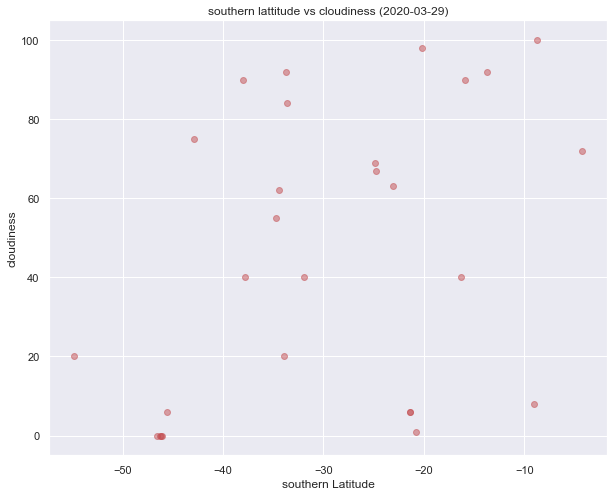

In [164]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(southern_hemisphere["lat"], southern_hemisphere["cloudiness"], color='r', alpha=0.5)
plt.xlabel('southern Latitude')
plt.ylabel('cloudiness')
plt.title(f'southern lattitude vs cloudiness ({datetime.now().date()})')
plt.savefig("S_lat_vs_cloudiness.png")
plt.show()

NameError: name 'slope' is not defined

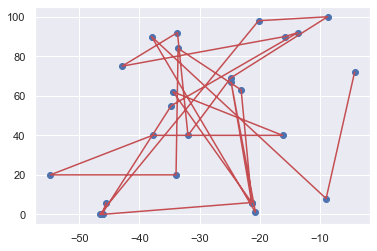

In [165]:
plt.scatter(southern_hemisphere["lat"], southern_hemisphere["cloudiness"])
plt.plot(southern_hemisphere["lat"], southern_hemisphere["cloudiness"],"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (6, 50), fontsize=15,color="red")
#plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["lat"], southern_hemisphere["cloudiness"])
print('the r value is', rvalue)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

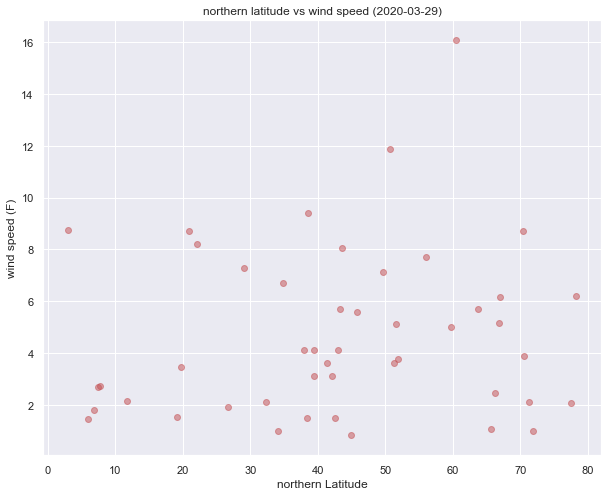

In [166]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(northern_hemisphere["lat"], northern_hemisphere["wind"], color='r', alpha=0.5)
plt.xlabel('northern Latitude')
plt.ylabel('wind speed (F)')
plt.title(f'northern latitude vs wind speed ({datetime.now().date()})')
plt.savefig("north_lat_vs_wind_speed.png")
plt.show()

NameError: name 'slope' is not defined

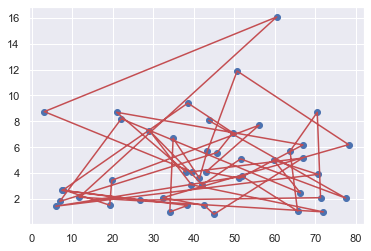

In [167]:
plt.scatter(northern_hemisphere["lat"], northern_hemisphere["wind"])
plt.plot(northern_hemisphere["lat"], northern_hemisphere["wind"],"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (6, 50), fontsize=15,color="red")
#plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["lat"], northern_hemisphere["wind"])
print('the r value is', rvalue)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

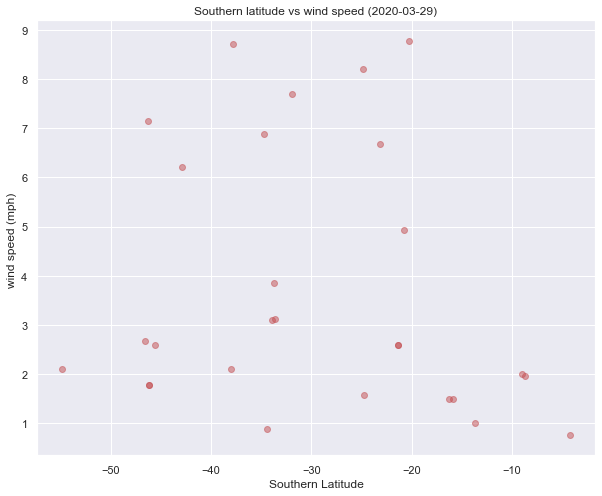

In [168]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(southern_hemisphere["lat"], southern_hemisphere["wind"], color='r', alpha=0.5)
plt.xlabel('Southern Latitude')
plt.ylabel('wind speed (mph) ')
plt.title(f'Southern latitude vs wind speed ({datetime.now().date()})')
plt.savefig("S_lat_vs_wind_speed.png")
plt.show()

NameError: name 'slope' is not defined

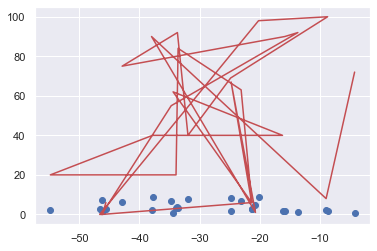

In [169]:
plt.scatter(southern_hemisphere["lat"], southern_hemisphere["wind"])
plt.plot(southern_hemisphere["lat"], southern_hemisphere["cloudiness"],"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (6, 50), fontsize=15,color="red")
#plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["lat"], southern_hemisphere["wind"])
print('the r value is', rvalue)